In [2174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as splt


import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


In [2175]:
df=pd.read_csv('D:\CSE 464\Project\Covid_dataset_updated.csv')
df

,Day,Lab_Test,Confirmed_Case,Death_Case,Class
0,2020-April-04,434,9,2,Non-Dangerous
1,2020-April-05,367,18,1,Non-Dangerous
2,2020-April-06,468,35,3,Non-Dangerous
3,2020-April-07,679,41,5,Non-Dangerous
4,2020-April-08,981,54,3,Non-Dangerous
...,...,...,...,...,...
621,2021-December-16,25203,257,3,Non-Dangerous
622,2021-December-17,16310,191,2,Non-Dangerous
623,2021-December-18,13991,122,4,Non-Dangerous
624,2021-December-19,19332,211,1,Non-Dangerous


In [2176]:
df.isnull().values.all()



False

In [2177]:
df.isnull().sum()

Day               0
Lab_Test          0
Confirmed_Case    0
Death_Case        0
Class             0
dtype: int64

In [2178]:
df

,Day,Lab_Test,Confirmed_Case,Death_Case,Class
0,2020-April-04,434,9,2,Non-Dangerous
1,2020-April-05,367,18,1,Non-Dangerous
2,2020-April-06,468,35,3,Non-Dangerous
3,2020-April-07,679,41,5,Non-Dangerous
4,2020-April-08,981,54,3,Non-Dangerous
...,...,...,...,...,...
621,2021-December-16,25203,257,3,Non-Dangerous
622,2021-December-17,16310,191,2,Non-Dangerous
623,2021-December-18,13991,122,4,Non-Dangerous
624,2021-December-19,19332,211,1,Non-Dangerous


In [2179]:
df['Class'].value_counts()


Dangerous        409
Non-Dangerous    217
Name: Class, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

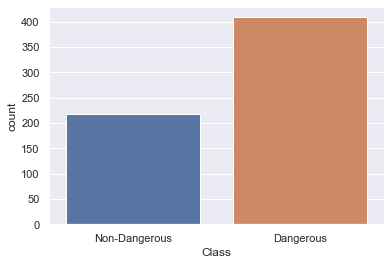

In [2180]:

sns.countplot(df['Class'])

In [2181]:
df.shape

(626, 5)

In [2182]:
df.dtypes

Day               object
Lab_Test           int64
Confirmed_Case     int64
Death_Case         int64
Class             object
dtype: object

In [2183]:
df

,Day,Lab_Test,Confirmed_Case,Death_Case,Class
0,2020-April-04,434,9,2,Non-Dangerous
1,2020-April-05,367,18,1,Non-Dangerous
2,2020-April-06,468,35,3,Non-Dangerous
3,2020-April-07,679,41,5,Non-Dangerous
4,2020-April-08,981,54,3,Non-Dangerous
...,...,...,...,...,...
621,2021-December-16,25203,257,3,Non-Dangerous
622,2021-December-17,16310,191,2,Non-Dangerous
623,2021-December-18,13991,122,4,Non-Dangerous
624,2021-December-19,19332,211,1,Non-Dangerous


In [2184]:
df['Detection_ratio']= (df['Confirmed_Case']/df['Lab_Test'])*100


In [2185]:
df['Detection_ratio']

0      2.073733
1      4.904632
2      7.478632
3      6.038292
4      5.504587
         ...   
621    1.019720
622    1.171061
623    0.871989
624    1.091455
625    1.302932
Name: Detection_ratio, Length: 626, dtype: float64

In [2186]:
df['Detection_ratio'].min()


0.8719891358730614

In [2187]:
df['Detection_ratio'].max()

32.55389638450089

In [2188]:
Q1_Detection_ratio=df.Detection_ratio.quantile(0.25)
Q3_Detection_ratio=df.Detection_ratio.quantile(0.75)
Q1_Detection_ratio,Q3_Detection_ratio

(5.977168372576598, 19.3394602268762)

In [2189]:
IQR_Detection_ratio=Q3_Detection_ratio-Q1_Detection_ratio
IQR_Detection_ratio

13.3622918542996

In [2190]:
lower_limit_Detection_ratio=Q1_Detection_ratio-1.5*IQR_Detection_ratio
upper_limit_Detection_ratio=Q3_Detection_ratio+1.5*IQR_Detection_ratio
lower_limit_Detection_ratio,upper_limit_Detection_ratio

(-14.066269408872804, 39.3828980083256)

In [2191]:
outlier = ((df["Detection_ratio"]<-14.0662694088728048) | (df["Detection_ratio"]>39.3828980083256)  )
print("There is {} outlier".format(df[outlier]["Class"].count()))

There is 0 outlier


In [2192]:
df = df[~outlier]

In [2193]:
df 

,Day,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio
0,2020-April-04,434,9,2,Non-Dangerous,2.073733
1,2020-April-05,367,18,1,Non-Dangerous,4.904632
2,2020-April-06,468,35,3,Non-Dangerous,7.478632
3,2020-April-07,679,41,5,Non-Dangerous,6.038292
4,2020-April-08,981,54,3,Non-Dangerous,5.504587
...,...,...,...,...,...,...
621,2021-December-16,25203,257,3,Non-Dangerous,1.019720
622,2021-December-17,16310,191,2,Non-Dangerous,1.171061
623,2021-December-18,13991,122,4,Non-Dangerous,0.871989
624,2021-December-19,19332,211,1,Non-Dangerous,1.091455


In [2194]:
df['Day'] = pd.to_datetime(df['Day'])

In [2195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 625
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Day              626 non-null    datetime64[ns]
 1   Lab_Test         626 non-null    int64         
 2   Confirmed_Case   626 non-null    int64         
 3   Death_Case       626 non-null    int64         
 4   Class            626 non-null    object        
 5   Detection_ratio  626 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 34.2+ KB


In [2196]:
df['Year'] = df['Day'].dt.year
df.head(10)


,Day,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year
0,2020-04-04,434,9,2,Non-Dangerous,2.073733,2020
1,2020-04-05,367,18,1,Non-Dangerous,4.904632,2020
2,2020-04-06,468,35,3,Non-Dangerous,7.478632,2020
3,2020-04-07,679,41,5,Non-Dangerous,6.038292,2020
4,2020-04-08,981,54,3,Non-Dangerous,5.504587,2020
5,2020-04-09,905,112,1,Dangerous,12.375691,2020
6,2020-04-10,1184,94,6,Non-Dangerous,7.939189,2020
7,2020-04-11,954,58,3,Non-Dangerous,6.079665,2020
8,2020-04-12,1340,139,4,Dangerous,10.373134,2020
9,2020-04-13,1570,182,5,Dangerous,11.592357,2020


In [2197]:
df.sample(10)

,Day,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year
206,2020-10-27,12617,1335,20,Dangerous,10.580962,2020
579,2021-11-04,18690,247,7,Non-Dangerous,1.321562,2021
318,2021-02-16,14788,396,13,Non-Dangerous,2.677847,2021
265,2020-12-25,13695,1163,20,Non-Dangerous,8.492150,2020
333,2021-03-03,16414,614,5,Non-Dangerous,3.740709,2021
488,2021-08-05,46995,12744,264,Dangerous,27.117778,2021
201,2020-10-22,14958,1696,24,Dangerous,11.338414,2020
224,2020-11-14,11795,1531,14,Dangerous,12.980076,2020
558,2021-10-14,21568,466,7,Non-Dangerous,2.160608,2021
47,2020-05-21,10262,1773,22,Dangerous,17.277334,2020


In [2198]:
df['Month'] = df['Day'].dt.month

df.head()

,Day,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month
0,2020-04-04,434,9,2,Non-Dangerous,2.073733,2020,4
1,2020-04-05,367,18,1,Non-Dangerous,4.904632,2020,4
2,2020-04-06,468,35,3,Non-Dangerous,7.478632,2020,4
3,2020-04-07,679,41,5,Non-Dangerous,6.038292,2020,4
4,2020-04-08,981,54,3,Non-Dangerous,5.504587,2020,4


In [2199]:
df.sample(10)

,Day,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month
529,2021-09-15,28615,1901,51,Non-Dangerous,6.643369,2021,9
581,2021-11-06,13072,154,1,Non-Dangerous,1.178091,2021,11
494,2021-08-11,44430,10420,237,Dangerous,23.452622,2021,8
8,2020-04-12,1340,139,4,Dangerous,10.373134,2020,4
310,2021-02-08,13762,316,16,Non-Dangerous,2.296178,2021,2
433,2021-06-11,18535,2454,43,Dangerous,13.239817,2021,6
548,2021-10-04,24928,794,18,Non-Dangerous,3.185173,2021,10
41,2020-05-15,8582,1202,15,Dangerous,14.006059,2020,5
353,2021-03-23,25954,3554,18,Dangerous,13.693458,2021,3
59,2020-06-02,12704,2911,37,Dangerous,22.914043,2020,6


In [2200]:
df['Day_no'] = df['Day'].dt.day

df.head()

,Day,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month,Day_no
0,2020-04-04,434,9,2,Non-Dangerous,2.073733,2020,4,4
1,2020-04-05,367,18,1,Non-Dangerous,4.904632,2020,4,5
2,2020-04-06,468,35,3,Non-Dangerous,7.478632,2020,4,6
3,2020-04-07,679,41,5,Non-Dangerous,6.038292,2020,4,7
4,2020-04-08,981,54,3,Non-Dangerous,5.504587,2020,4,8


(array([18383., 18444., 18506., 18567., 18628., 18687., 18748., 18809.,
        18871., 18932., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

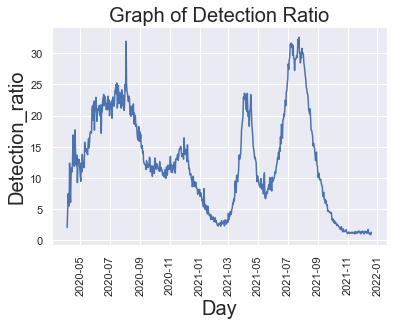

In [2201]:
fig, ax = plt.subplots()
ax.set_title('Graph of Detection Ratio', fontsize = 20)
ax.set_xlabel('Day', fontsize = 20)
ax.set_ylabel('Detection_ratio', fontsize = 20)
df = df.sort_values('Day', ascending=True)
plt.plot(df['Day'], df['Detection_ratio'])
plt.xticks(rotation='vertical')

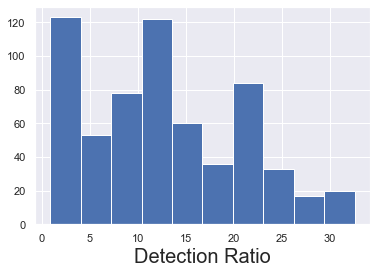

In [2202]:
plt.hist(df['Detection_ratio'], bins=10)
plt.xlabel('Detection Ratio', fontsize = 20)
plt.show()

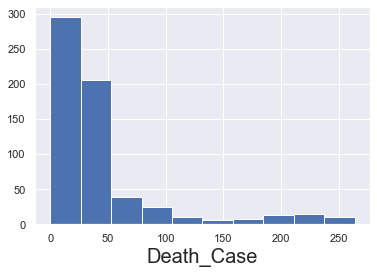

In [2203]:
plt.hist(df['Death_Case'], bins=10)
plt.xlabel('Death_Case', fontsize = 20)
plt.show()

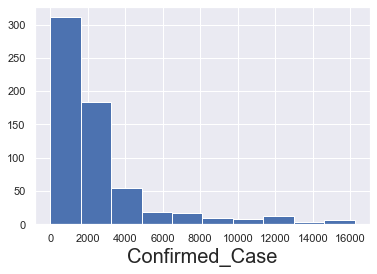

In [2204]:
plt.hist(df['Confirmed_Case'], bins=10)
plt.xlabel('Confirmed_Case', fontsize = 20)
plt.show()

In [2205]:
del df['Day']



In [2206]:
df 

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month,Day_no
0,434,9,2,Non-Dangerous,2.073733,2020,4,4
1,367,18,1,Non-Dangerous,4.904632,2020,4,5
2,468,35,3,Non-Dangerous,7.478632,2020,4,6
3,679,41,5,Non-Dangerous,6.038292,2020,4,7
4,981,54,3,Non-Dangerous,5.504587,2020,4,8
...,...,...,...,...,...,...,...,...
621,25203,257,3,Non-Dangerous,1.019720,2021,12,16
622,16310,191,2,Non-Dangerous,1.171061,2021,12,17
623,13991,122,4,Non-Dangerous,0.871989,2021,12,18
624,19332,211,1,Non-Dangerous,1.091455,2021,12,19


In [2207]:
df['Class']=pd.factorize(df.Class)[0]

In [2208]:
df.head(7)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month,Day_no
0,434,9,2,0,2.073733,2020,4,4
1,367,18,1,0,4.904632,2020,4,5
2,468,35,3,0,7.478632,2020,4,6
3,679,41,5,0,6.038292,2020,4,7
4,981,54,3,0,5.504587,2020,4,8
5,905,112,1,1,12.375691,2020,4,9
6,1184,94,6,0,7.939189,2020,4,10


In [2209]:
df.sample(10)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month,Day_no
533,24623,1383,43,0,5.616700,2021,9,19
437,23265,3319,50,1,14.266065,2021,6,15
202,14119,1586,14,1,11.233090,2020,10,23
133,12891,2644,34,1,20.510434,2020,8,15
579,18690,247,7,0,1.321562,2021,11,4
410,20528,1608,37,0,7.833203,2021,5,19
330,13411,385,8,0,2.870778,2021,2,28
195,13577,1527,15,1,11.246962,2020,10,16
568,18485,275,9,0,1.487693,2021,10,24
443,24057,4636,78,1,19.270898,2021,6,21


In [2210]:
pear_corr=df.corr(method='pearson')
pear_corr.style.background_gradient(cmap='YlGnBu', axis=0)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Year,Month,Day_no
Lab_Test,1.000000,0.802410,0.784627,0.073593,0.322409,0.577992,0.105404,0.010479
Confirmed_Case,0.802410,1.000000,0.931488,0.459677,0.767985,0.190680,-0.033751,-0.009617
Death_Case,0.784627,0.931488,1.000000,0.386361,0.680439,0.273988,-0.013468,0.008256
Class,0.073593,0.459677,0.386361,1.000000,0.773791,-0.516595,0.065056,0.040052
Detection_ratio,0.322409,0.767985,0.680439,0.773791,1.000000,-0.306905,-0.076456,0.009399
Year,0.577992,0.190680,0.273988,-0.516595,-0.306905,1.000000,-0.266575,-0.030216
Month,0.105404,-0.033751,-0.013468,0.065056,-0.076456,-0.266575,1.000000,-0.029262
Day_no,0.010479,-0.009617,0.008256,0.040052,0.009399,-0.030216,-0.029262,1.000000


In [2211]:
del df['Year']

In [2212]:
df

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no
0,434,9,2,0,2.073733,4,4
1,367,18,1,0,4.904632,4,5
2,468,35,3,0,7.478632,4,6
3,679,41,5,0,6.038292,4,7
4,981,54,3,0,5.504587,4,8
...,...,...,...,...,...,...,...
621,25203,257,3,0,1.019720,12,16
622,16310,191,2,0,1.171061,12,17
623,13991,122,4,0,0.871989,12,18
624,19332,211,1,0,1.091455,12,19


In [2213]:
df['Lab_Test_Band'] = pd.cut(df['Lab_Test'], 3)
print (df['Lab_Test_Band'])


0        (312.083, 18672.667]
1        (312.083, 18672.667]
2        (312.083, 18672.667]
3        (312.083, 18672.667]
4        (312.083, 18672.667]
                ...          
621    (18672.667, 36978.333]
622      (312.083, 18672.667]
623      (312.083, 18672.667]
624    (18672.667, 36978.333]
625    (18672.667, 36978.333]
Name: Lab_Test_Band, Length: 626, dtype: category
Categories (3, interval[float64, right]): [(312.083, 18672.667] < (18672.667, 36978.333] < (36978.333, 55284.0]]


In [2214]:
df['Confirmed_Case_Band'] = pd.cut(df['Confirmed_Case'], 3)
print (df['Confirmed_Case_Band'])

0      (-7.221, 5416.0]
1      (-7.221, 5416.0]
2      (-7.221, 5416.0]
3      (-7.221, 5416.0]
4      (-7.221, 5416.0]
             ...       
621    (-7.221, 5416.0]
622    (-7.221, 5416.0]
623    (-7.221, 5416.0]
624    (-7.221, 5416.0]
625    (-7.221, 5416.0]
Name: Confirmed_Case_Band, Length: 626, dtype: category
Categories (3, interval[float64, right]): [(-7.221, 5416.0] < (5416.0, 10823.0] < (10823.0, 16230.0]]


In [2215]:
df['Death_Case_Band'] = pd.cut(df['Death_Case'], 3)
print (df['Death_Case_Band'])

0      (-0.264, 88.0]
1      (-0.264, 88.0]
2      (-0.264, 88.0]
3      (-0.264, 88.0]
4      (-0.264, 88.0]
            ...      
621    (-0.264, 88.0]
622    (-0.264, 88.0]
623    (-0.264, 88.0]
624    (-0.264, 88.0]
625    (-0.264, 88.0]
Name: Death_Case_Band, Length: 626, dtype: category
Categories (3, interval[float64, right]): [(-0.264, 88.0] < (88.0, 176.0] < (176.0, 264.0]]


In [2216]:
df['Day_no_Band'] = pd.cut(df['Day_no'],3)
print (df['Day_no_Band'])

0      (0.97, 11.0]
1      (0.97, 11.0]
2      (0.97, 11.0]
3      (0.97, 11.0]
4      (0.97, 11.0]
           ...     
621    (11.0, 21.0]
622    (11.0, 21.0]
623    (11.0, 21.0]
624    (11.0, 21.0]
625    (11.0, 21.0]
Name: Day_no_Band, Length: 626, dtype: category
Categories (3, interval[float64, right]): [(0.97, 11.0] < (11.0, 21.0] < (21.0, 31.0]]


In [2217]:
def binningFunction(col, cut_points,labels=None):
  minval=col.min()
  maxval=col.max()
  break_points=[minval]+cut_points+[maxval]
  print(break_points)
  if not labels:
    labels=range(len(cut_oints)+1)
  colSin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colSin

In [2218]:
cut_points=[18672,36978] 
labels=["Lab1","Lab2","Lab3"]
df["Lab_Test"]=binningFunction(df["Lab_Test"],cut_points,labels)

[367, 18672, 36978, 55284]


In [2219]:
cut_points=[5416,10823] 
labels=["Con1","Con2","Con3"]
df["Confirmed_Case"]=binningFunction(df["Confirmed_Case"],cut_points,labels)

[9, 5416, 10823, 16230]


In [2220]:
cut_points=[88,176,]
labels=["Dth1","Dth2","Dth3"]
df["Death_Case"]=binningFunction(df["Death_Case"],cut_points,labels)

[0, 88, 176, 264]


In [2221]:
cut_points=[11,21]
labels=["D10","D20","D30"]
df["Day_no"]=binningFunction(df["Day_no"],cut_points,labels)

[1, 11, 21, 31]


In [2222]:
df.sample(5)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
193,Lab1,Con1,Dth1,1,11.685518,10,D20,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
29,Lab1,Con1,Dth1,1,12.388227,5,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
242,Lab1,Con1,Dth1,1,13.761583,12,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
144,Lab1,Con1,Dth1,1,16.715328,8,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
425,Lab1,Con1,Dth1,1,9.939901,6,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

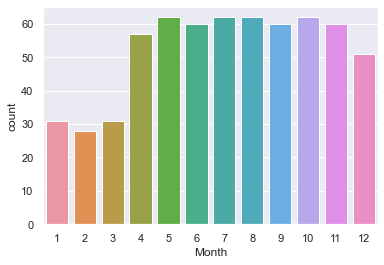

In [2223]:
sns.countplot(df['Month'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day_no', ylabel='count'>

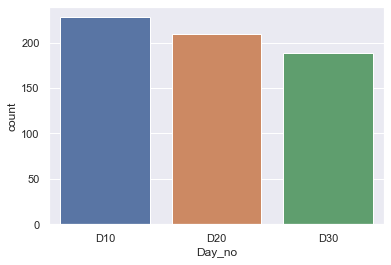

In [2224]:
sns.countplot(df['Day_no'])

In [2225]:
LabMapping={
            "Lab1": 0,
            "Lab2": 1,
            "Lab3": 2,         
}

In [2226]:
df["Lab_Test"]=df["Lab_Test"].map(LabMapping)

In [2227]:
df.sample(10)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
262,0,Con1,Dth1,0,8.702542,12,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
301,0,Con1,Dth1,0,3.003972,1,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
579,1,Con1,Dth1,0,1.321562,11,D10,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
119,0,Con1,Dth1,1,24.982958,8,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
509,1,Con1,Dth2,1,13.772683,8,D30,"(18672.667, 36978.333]","(-7.221, 5416.0]","(88.0, 176.0]","(21.0, 31.0]"
415,0,Con1,Dth1,0,8.149070,5,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
387,1,Con1,Dth2,1,12.820911,4,D30,"(18672.667, 36978.333]","(-7.221, 5416.0]","(88.0, 176.0]","(21.0, 31.0]"
506,1,Con2,Dth2,1,15.539971,8,D30,"(18672.667, 36978.333]","(5416.0, 10823.0]","(88.0, 176.0]","(21.0, 31.0]"
161,0,Con1,Dth1,1,11.955609,9,D20,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
168,0,Con1,Dth1,1,11.898254,9,D20,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"


In [2228]:
ConMapping={
            "Con1": 0,
            "Con2": 1,
            "Con3": 2  }

In [2229]:
df["Confirmed_Case"]=df["Confirmed_Case"].map(ConMapping)

In [2230]:
df.sample(10)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
50,0,0,Dth1,1,17.198024,5,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
396,1,0,Dth1,0,8.588050,5,D10,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
114,0,0,Dth1,1,21.556886,7,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
152,0,0,Dth1,1,14.963251,9,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
610,1,0,Dth1,0,1.029688,12,D10,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
146,0,0,Dth1,1,16.090532,8,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
183,0,0,Dth1,1,11.410894,10,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
356,1,0,Dth1,1,13.689146,3,D30,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
35,0,0,Dth1,1,11.637694,5,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
376,1,0,Dth2,1,21.003056,4,D20,"(18672.667, 36978.333]","(-7.221, 5416.0]","(88.0, 176.0]","(11.0, 21.0]"


In [2231]:
DthMapping={
            "Dth1": 0,
            "Dth2": 1,
            "Dth3": 2  }

In [2232]:
df["Death_Case"]=df["Death_Case"].map(DthMapping)

In [2233]:
df.sample(10)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
295,0,0,0,0,3.338274,1,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
136,0,0,0,1,21.872864,8,D20,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
41,0,0,0,1,14.006059,5,D20,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
227,0,0,0,1,13.833646,11,D20,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
419,0,0,0,1,9.297549,5,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
464,2,2,2,1,31.243334,7,D20,"(36978.333, 55284.0]","(10823.0, 16230.0]","(176.0, 264.0]","(11.0, 21.0]"
153,0,0,0,1,14.755603,9,D10,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
462,1,1,2,1,31.458901,7,D10,"(18672.667, 36978.333]","(5416.0, 10823.0]","(176.0, 264.0]","(0.97, 11.0]"
498,1,1,2,1,20.253932,8,D20,"(18672.667, 36978.333]","(5416.0, 10823.0]","(176.0, 264.0]","(11.0, 21.0]"
176,0,0,0,1,11.932616,9,D30,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"


In [2234]:
DayMapping={
            "D10": 0,
            "D20": 1,
            "D30": 2  }

In [2235]:
df["Day_no"]=df["Day_no"].map(DayMapping)

In [2236]:
df.sample(10)

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
376,1,0,1,1,21.003056,4,1,"(18672.667, 36978.333]","(-7.221, 5416.0]","(88.0, 176.0]","(11.0, 21.0]"
174,0,0,0,1,11.087950,9,2,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
347,1,0,0,0,7.682801,3,1,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
296,0,0,0,0,4.059613,1,2,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
383,1,0,1,1,14.634146,4,2,"(18672.667, 36978.333]","(-7.221, 5416.0]","(88.0, 176.0]","(21.0, 31.0]"
8,0,0,0,1,10.373134,4,1,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
97,0,0,0,1,21.863879,7,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
423,0,0,0,1,9.671233,6,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
444,1,0,0,1,19.362314,6,2,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
258,0,0,0,1,9.193638,12,1,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"


In [2237]:
df

,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
0,0,0,0,0,2.073733,4,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
1,0,0,0,0,4.904632,4,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
2,0,0,0,0,7.478632,4,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
3,0,0,0,0,6.038292,4,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
4,0,0,0,0,5.504587,4,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
...,...,...,...,...,...,...,...,...,...,...,...
621,1,0,0,0,1.019720,12,1,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
622,0,0,0,0,1.171061,12,1,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
623,0,0,0,0,0.871989,12,1,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"
624,1,0,0,0,1.091455,12,1,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(11.0, 21.0]"


In [2238]:
df.sample(10)



,Lab_Test,Confirmed_Case,Death_Case,Class,Detection_ratio,Month,Day_no,Lab_Test_Band,Confirmed_Case_Band,Death_Case_Band,Day_no_Band
221,0,0,0,1,11.931975,11,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
96,0,0,0,1,21.494371,7,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
468,2,2,2,1,28.960355,7,1,"(36978.333, 55284.0]","(10823.0, 16230.0]","(176.0, 264.0]","(11.0, 21.0]"
577,1,0,0,0,1.143228,11,0,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
81,0,0,0,1,21.067364,6,2,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
189,0,0,0,1,11.078368,10,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
540,1,0,0,0,4.410243,9,2,"(18672.667, 36978.333]","(-7.221, 5416.0]","(-0.264, 88.0]","(21.0, 31.0]"
474,0,0,2,1,32.187010,7,2,"(312.083, 18672.667]","(-7.221, 5416.0]","(176.0, 264.0]","(21.0, 31.0]"
581,0,0,0,0,1.178091,11,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"
124,0,0,0,1,23.426188,8,0,"(312.083, 18672.667]","(-7.221, 5416.0]","(-0.264, 88.0]","(0.97, 11.0]"


In [2239]:
del df['Lab_Test_Band']
del df['Confirmed_Case_Band']
del df['Death_Case_Band']
del df['Detection_ratio']
del df['Day_no_Band']

In [2240]:
df.sample(10)


,Lab_Test,Confirmed_Case,Death_Case,Class,Month,Day_no
139,0,0,0,1,8,1
257,0,0,0,0,12,1
360,1,0,0,1,3,2
146,0,0,0,1,8,2
607,1,0,0,0,12,0
136,0,0,0,1,8,1
385,1,0,0,1,4,2
428,0,0,0,1,6,0
77,0,0,0,1,6,1
483,1,1,2,1,7,2


In [2241]:
y = df["Class"]
X = df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =70)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(438, 5) (188, 5) (438,) (188,)


In [2242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2243]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=70)
svm = SVC(random_state=40)
LogR = LogisticRegression()

In [2244]:
models = {"Decision Tree" : dtc,
          "Random Forest" : ran,
          "K-Nearest Neighbor" : knn,
          "SVM" : svm,
          "Logistic Regression": LogR  }
scores= { }

In [2245]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [2246]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random Forest,0.909574
Decision Tree,0.898936
K-Nearest Neighbor,0.888298
SVM,0.888298
Logistic Regression,0.734043


In [2247]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [2248]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93181818 0.84090909 0.86363636 0.81818182 0.88636364 0.88636364
 0.88636364 0.90909091 0.93023256 0.88372093]


In [2249]:
clf = RandomForestClassifier(n_estimators=90)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93181818 0.84090909 0.86363636 0.86363636 0.88636364 0.88636364
 0.88636364 0.90909091 0.93023256 0.93023256]
